In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 


In [4]:
df = pd.read_csv("house price data.csv")

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [10]:
df["waterfront"].value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

In [11]:
df["view"].value_counts()

view
0    4140
2     205
3     116
4      70
1      69
Name: count, dtype: int64

In [12]:
df["condition"].value_counts()

condition
3    2875
4    1252
5     435
2      32
1       6
Name: count, dtype: int64

In [14]:
df["country"].value_counts()

country
USA    4600
Name: count, dtype: int64

In [15]:
df["city"].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [17]:
df["statezip"].dtype

dtype('O')

In [18]:
df2 = df.drop(["country"] , axis=1)

In [19]:
df2.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119


In [20]:
df2.shape

(4600, 17)

In [21]:
df2["street"]

0           18810 Densmore Ave N
1                709 W Blaine St
2       26206-26214 143rd Ave SE
3                857 170th Pl NE
4              9105 170th Ave NE
                  ...           
4595              501 N 143rd St
4596            14855 SE 10th Pl
4597            759 Ilwaco Pl NE
4598           5148 S Creston St
4599           18717 SE 258th St
Name: street, Length: 4600, dtype: object

In [28]:
df2["price"]

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

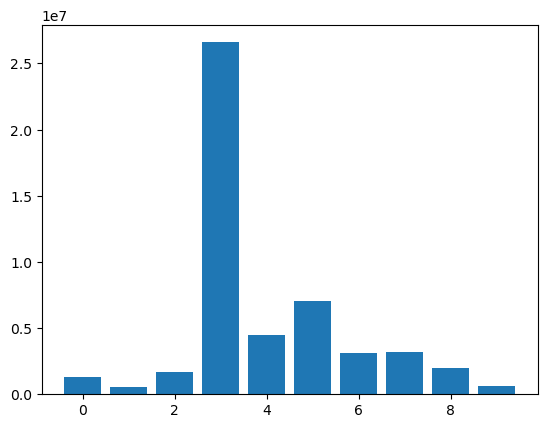

In [27]:
plt.bar(df2["bedrooms"] , df2["price"]);

In [34]:
df2[df2["city"] == "Seattle"]["price"]

1       2.384000e+06
5       4.900000e+05
9       6.400000e+05
11      1.400000e+06
13      3.650000e+05
            ...     
4582    4.060625e+05
4585    4.868950e+05
4591    3.961667e+05
4595    3.081667e+05
4598    2.034000e+05
Name: price, Length: 1573, dtype: float64

In [64]:
df2.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119


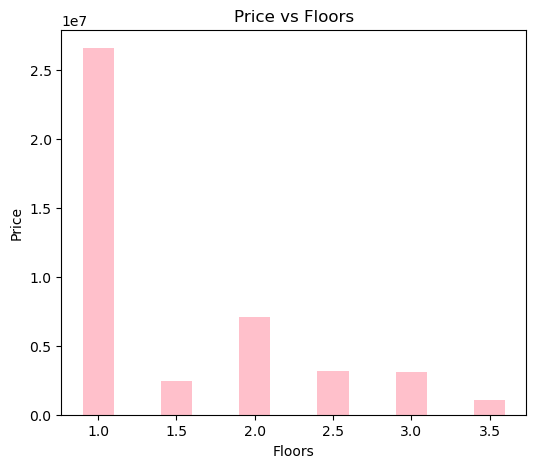

In [67]:
plt.figure(figsize=(6,5))
plt.bar(df2["floors"] , df2["price"] ,align="center" , width=0.2 ,color="pink");
plt.xlabel("Floors")
plt.ylabel("Price")
plt.title("Price vs Floors")
plt.show()

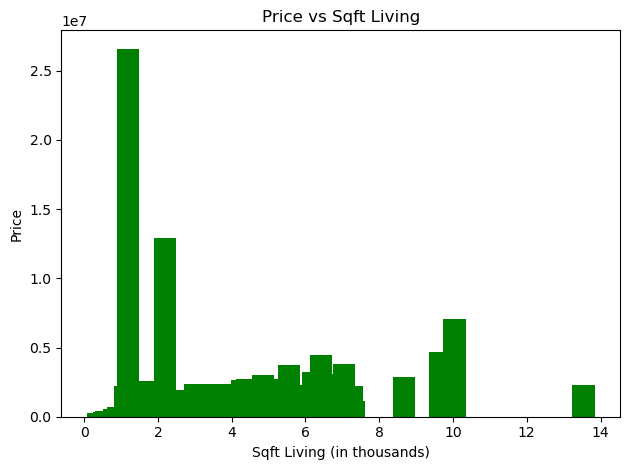

In [63]:
plt.bar(df2["sqft_living"]/1000 , df2["price"] , align="center" ,width=0.6 , color="green" )
plt.xlabel('Sqft Living (in thousands)')
plt.ylabel('Price')
plt.title('Price vs Sqft Living')
plt.tight_layout()
plt.show()

<Figure size 1000x1200 with 0 Axes>

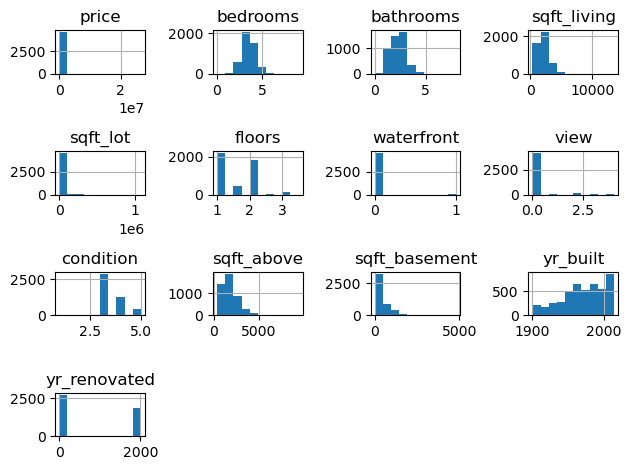

In [51]:
plt.figure(figsize=(10,12))
df2.hist()
plt.tight_layout()
plt.show();

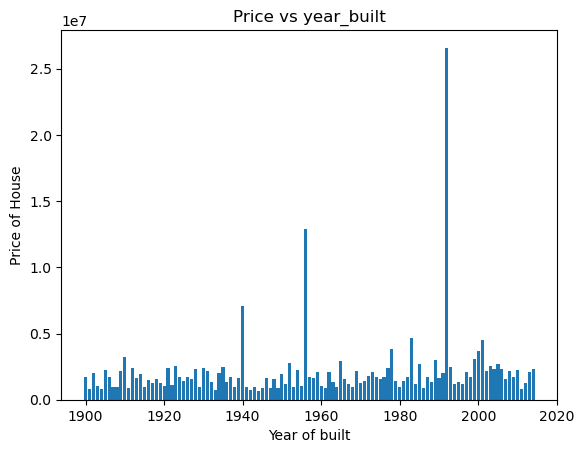

In [76]:
plt.bar(df2["yr_built"] , df2["price"])
plt.xlabel("Year of built")
plt.ylabel("Price of House")
plt.title("Price vs year_built")
plt.show()

In [75]:
df2.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119


In [79]:
city_count = df2["city"].value_counts()

In [80]:
cities_less_than_10 = city_count[city_count<=10]
cities_less_than_10

city
Black Diamond          9
Ravensdale             7
Pacific                6
Algona                 5
Yarrow Point           4
Skykomish              3
Preston                2
Milton                 2
Inglewood-Finn Hill    1
Snoqualmie Pass        1
Beaux Arts Village     1
Name: count, dtype: int64

In [81]:
df2["city"] = df2["city"].apply(lambda x: "other" if x in cities_less_than_10 else x)

In [84]:
len(df2["street"].unique())

4525

In [90]:
df2["statezip"] = df2["statezip"].apply(lambda x: x[3:]).astype("int64")

In [92]:
df2["statezip"].dtype

dtype('int64')

In [93]:
df2.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119


In [95]:
df3 = df2

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
street_matrix =  cv.fit_transform(df3["street"])

In [99]:
street_df = pd.DataFrame(street_matrix.toarray() , columns = cv.get_feature_names_out())

In [100]:
street_df.head()

,10,100,1000,10000,10005,10009,1001,10010,10012,1002,...,wilson,winona,wolcott,woodinville,woodland,woodlawn,woodmont,woodside,yale,yesler
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
city_matrix = cv.fit_transform(df3["city"])

In [102]:
city_df = pd.DataFrame(city_matrix.toarray() , columns = cv.get_feature_names_out())

In [103]:
city_df.head()

,auburn,bellevue,bend,bothell,burien,carnation,city,clyde,covington,des,...,sammamish,seatac,seattle,shoreline,snoqualmie,tukwila,valley,vashon,way,woodinville
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df3.drop(["city" , "street"] ,axis=1 , inplace=True)

In [105]:
df3 = pd.concat([df3 , city_df , street_df] , axis=1)

In [106]:
df3.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,wilson,winona,wolcott,woodinville,woodland,woodlawn,woodmont,woodside,yale,yesler
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df3.drop(["date"] , axis=1 , inplace=True)

In [108]:
X = df3.drop(["price"] , axis=1)
y = df3["price"]

X_train , X_test , y_train ,y_test = train_test_split(X , y,test_size=0.2)

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [110]:
model.fit(X_train , y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test)

In [114]:
y_test[:5]

299     209950.0
724     197500.0
3444    402000.0
1701    316000.0
3847    475000.0
Name: price, dtype: float64

In [117]:
y_pred = y_pred.round(1).astype(int)

In [119]:
model.score(X_test , y_test)

-3012.0194929821587

In [120]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred , y_test)

2636366890996612.5